In [48]:
import warnings
warnings.filterwarnings('ignore')

# Régression linéaire simple

### Réalisons une régression linéaire simple

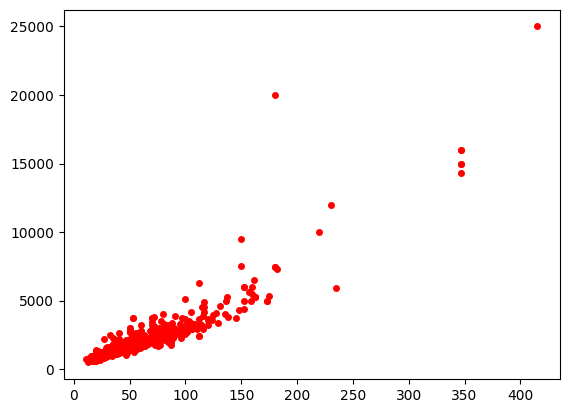

In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house.csv')

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()


Clairement, d'après la visualisation, on peut se dire que le montant du loyer dépend de manière linéaire de la surface du logement. On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite. 

Aussi, on peut voir que lorsque la surface devient un peu trop grande, les données semblent devenir moins modélisables facilement, il y a plus de variabilité. On va considérer pour l'instant résoudre le problème de prédiction pour les loyers inférieurs à 10,000€, afin de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.

In [2]:
house_data = house_data[house_data['loyer'] < 10000] # on enlève un outlier

Dans notre exemple, nous utilisons un dataset unidimensionnel en entrée (où les observations dépendent seulement de la variable x = surface) pour un souci de confort, car c’est plus facile à représenter visuellement. En réalité, on a bien plus de dimensions (features) lorsqu’on travaille avec de "vraies" données !

In [3]:
house_data.describe()

,loyer,surface
count,536.000000,536.000000
mean,2078.897388,59.111940
std,1212.192202,35.901977
min,488.000000,11.000000
25%,1250.000000,32.000000
50%,1765.000000,50.000000
75%,2500.000000,74.250000
max,9500.000000,235.000000


In [4]:
house_data

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


In [5]:
house_data.corr() # on regarde la corrélation linéaire

,loyer,surface
loyer,1.000000,0.908105
surface,0.908105,1.000000


La régression linéaire simple permet d'expliquer, de manière linéaire, une variable Y(variable à expliquer), aléatoire en fonction d'une variable explicative X.

Le modèle de régression linéaire simple suppose, comme son nom l'indique, qu'il existe une relation linéaire entre la variable à expliquer et la variable explicative :
Y = β1 + β2 X + ε 
Mathématiquement, on considère que :
Y est une variable aléatoire, observable ;
X est une variable déterministe (non aléatoire), observable ;
β1 et β2 sont des paramètres inconnus (non observables) ;
ε est une variable aléatoire centrée (autour de 0) de variance σ2 
    inconnue (c'est également un paramètre du modèle).

L'objectif est de déterminer, d'estimer les paramètres de la droite de régression :
l'ordonnée à l'origine β1
et le coefficient directeur β2


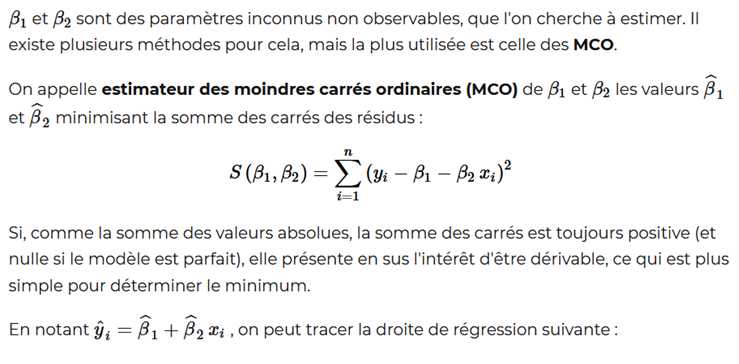


Dans le cas où au moins un des xi diffère des autres (ce qui est toujours le cas en pratique), les estimateurs des MCO de (β1,β2) valent :


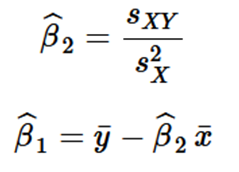






Remarquons que le coefficient directeur de la droite est proportionnel à la covariance empirique entre X et Y , qui est, rappelons-le, une mesure de la dépendance linéaire entre les variables.

L'équation de la droite de régression est :

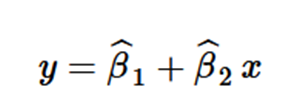


In [6]:
cov = np.cov(house_data.loyer,house_data.surface) # calcule des covariance

cov 

array([[1.46940994e+06, 3.95208078e+04],
       [3.95208078e+04, 1.28895193e+03]])

In [7]:
beta2 = cov[0,1]/ cov[1,1] #calcule du deuxième coeff

In [8]:
beta1 = house_data.loyer.mean() - beta2*house_data.surface.mean()  #calcule du premier coeff

In [9]:
house_data["pred"] = beta1  + beta2*house_data.surface

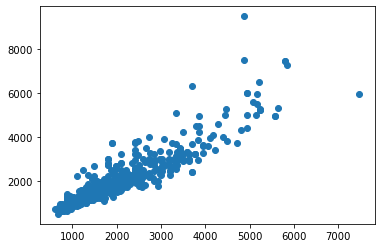

In [10]:
plt.scatter(house_data["pred"], house_data["loyer"])

### calcule du R2 à la main

In [11]:


def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(house_data["pred"], house_data["loyer"])

print (score_bl)

0.8246543068110018


### calcule du R2 avec sklearn

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
r2_score( house_data["loyer"],house_data["pred"])

0.8246543068110018

In [14]:
beta2

30.661195961290563

In [15]:
beta1

266.4546029150554

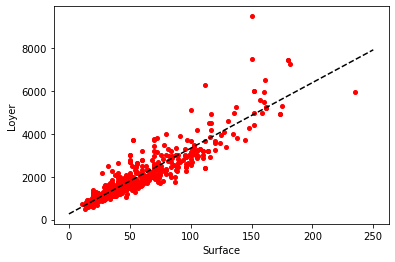

In [16]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [beta1,beta1 + 250 * beta2], linestyle='--', c='#000000')

plt.show()

# Utilisez le modèle pour effectuer des prédictions

Maintenant qu’on a notre paramètre θ
, c’est-à-dire qu’on a trouvé la droite qui colle le mieux à nos données d’entraînement, on peut effectuer des prédictions sur de nouvelles données, c'est-à-dire prédire le loyer en fonction de la surface qu’on nous donne en entrée, en appliquant directement la formule du modèle ci-dessus.

Par exemple, si on l’applique pour une surface de 35 mètres carrés :

In [17]:
beta1 + beta2 * 35

1339.5964615602252

On obtient une estimation du loyer :

In [18]:
beta1 + beta2 * 35

1339.5964615602252

# Et avec sklearn ?

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.predict(<des données de test>)

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [20]:
X = np.array(house_data["surface"]).reshape((-1, 1))
y = house_data["loyer"]

In [21]:
X

array([[ 37],
       [ 32],
       [ 26],
       [ 30],
       [ 70],
       [ 24],
       [ 41],
       [ 67],
       [ 63],
       [ 70],
       [ 81],
       [ 26],
       [ 36],
       [ 19],
       [ 20],
       [ 25],
       [ 35],
       [120],
       [ 40],
       [ 30],
       [ 25],
       [ 21],
       [ 44],
       [ 35],
       [ 54],
       [ 39],
       [ 34],
       [ 28],
       [ 32],
       [ 40],
       [ 42],
       [ 31],
       [ 33],
       [ 39],
       [ 47],
       [ 33],
       [ 37],
       [ 42],
       [ 46],
       [ 37],
       [ 46],
       [ 42],
       [ 49],
       [ 48],
       [ 50],
       [ 54],
       [ 54],
       [ 45],
       [ 53],
       [ 40],
       [ 35],
       [ 40],
       [ 35],
       [ 60],
       [ 30],
       [ 34],
       [ 64],
       [ 47],
       [ 43],
       [ 62],
       [ 50],
       [ 53],
       [ 50],
       [ 50],
       [ 60],
       [ 42],
       [ 52],
       [ 45],
       [ 41],
       [ 63],
       [ 53],
      

In [22]:
regr.fit(X,y)

LinearRegression()

In [23]:
pred = regr.predict(X)

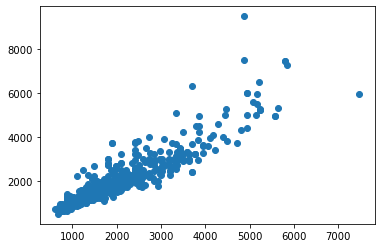

In [24]:
plt.scatter(pred, house_data["loyer"])

In [25]:
r2_score( house_data["loyer"],house_data["pred"])

0.8246543068110018

# splittons les données pour voir si le modèle généralise

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(house_data[["surface"]], house_data[["loyer"]], test_size=0.3)

In [28]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
ypred_train = regr.predict(xtrain)

In [30]:
ypred_test = regr.predict(xtest)

In [31]:
r2_score(ytrain, ypred_train)

0.8174942043112159

In [32]:
r2_score(ytest, ypred_test)

0.8434243785079377

# Première phase: exploration/nettoyage des données

In [33]:


# Chargement des données
raw_data = pd.read_csv('house_data.csv')



In [34]:
raw_data

,price,surface,arrondissement
0,1820,46.10,1.0
1,1750,41.00,1.0
2,1900,55.00,1.0
3,1950,46.00,1.0
4,1950,49.00,1.0
...,...,...,...
822,850,35.00,10.0
823,700,10.00,10.0
824,1280,34.00,10.0
825,1545,65.00,10.0


In [35]:


# Il y a quelques valeurs manquantes, on supprime ces lignes
data_na = raw_data.dropna()

# Comme vu dans le TP, on a des outliers sur les grandes propriétés
data = data_na[data_na["price"] < 8000]

# On reindexe
data = data.reset_index(drop = True)



<AxesSubplot:xlabel='price', ylabel='surface'>

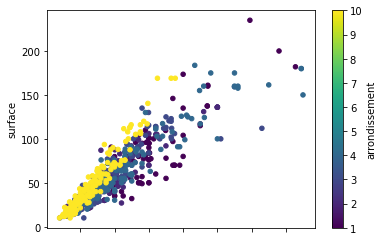

In [36]:
# On affiche les données nettoyées
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')

In [37]:
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

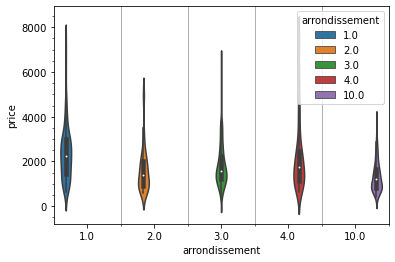

In [38]:


ax1 = sns.violinplot(x = "arrondissement", y = "price", data=data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)



La répartition des prix semble a peu près la même, avec moins de loyers élévés (+volatiles) dans le 10ème. Si on considère qu'on a des échantillons représentatifs. Il faut de toute manière croiser avec la surface pour avoir une vision plus claire

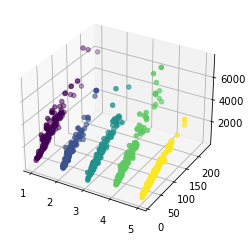

In [39]:


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().add_subplot(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis")

plt.show()




On va effectuer une régression specifique sur chaque arrondissement, pour avoir plus de précision. D'abord, séparation jeu de données d'entraînement / jeu de données test

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(data[["surface", "arrondissement"]], data[["price"]], test_size=0.3)

Créons ensuite la baseline, et calculons le R2 (la somme quadratique des résidus), comme valeur d'évaluation de notre regression.¶

In [41]:
ytest

,price
727,938
103,2807
506,1200
347,1740
670,799
...,...
784,830
803,1300
64,1905
141,3750


In [42]:
xtest[["surface"]]

,surface
727,32.67
103,94.90
506,30.00
347,49.00
670,24.00
...,...
784,27.46
803,50.00
64,65.00
141,70.00


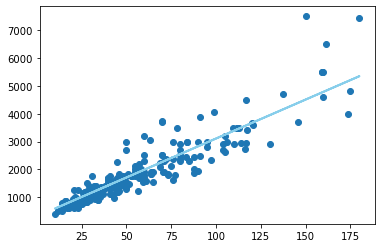

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.scatter(xtest[["surface"]], ytest)
plt.plot(np.array(xtest[["surface"]]), baseline_pred, color="skyblue", linewidth = 2)

In [44]:


def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_pred[:,0], ytest['price'])

print (score_bl)



0.8433953963302864


In [45]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    
    # On génère un jeu de données par arrondissement
    tr_arr = xtrain['arrondissement']==i
    te_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[tr_arr]
    ytrain_arr = ytrain[tr_arr]

    xtest_arr = xtest[te_arr]
    ytest_arr = ytest[te_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

On effectue la prédiction finale sur le jeu de donnée test avec notre nouveau modèle, qui combine les différents modèles par arrondissement

In [49]:
final_pred = []

for idx,val in xtest.iterrows():
    final_pred.append(lrs[int(val["arrondissement"]-1)].predict([[val["surface"]]])[0][0])
    
r2score(final_pred, ytest["price"])

0.8719402013544132

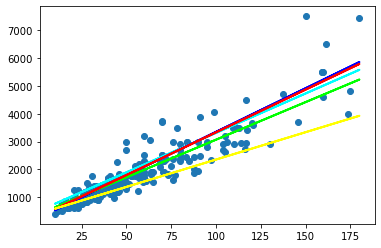

In [47]:
plt.scatter(xtest[["surface"]], ytest)
plt.plot(np.array(xtest[["surface"]]), lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(np.array(xtest[["surface"]]), lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(np.array(xtest[["surface"]]), lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(np.array(xtest[["surface"]]), lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(np.array(xtest[["surface"]]), lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)

In [49]:
compa = pd.DataFrame ()

In [50]:
compa.loc['score',"reg_lin"]  = round(r2score(final_pred, ytest["price"]),3) #sauvegardons le score

In [51]:
compa

,reg_lin
score,0.844


# Testons un autre algo

In [52]:
from sklearn.neighbors import KNeighborsRegressor


In [53]:
# On récupère le régresseur le plus performant
knn = KNeighborsRegressor(n_neighbors=7) #hyperparamètre
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

In [54]:
ytest

,price
804,1488
413,2200
509,1300
749,1800
28,2941
...,...
140,3000
259,899
581,3840
549,950


In [55]:
r2score(predicted, np.array(ytest))

array([0.81226824])

### Testons plusieurs K

In [56]:
scores =[]

for k in range(1,20) :
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
    predicted= knn.predict(xtest)
    
    scores.append(r2score(predicted, np.array(ytest)))

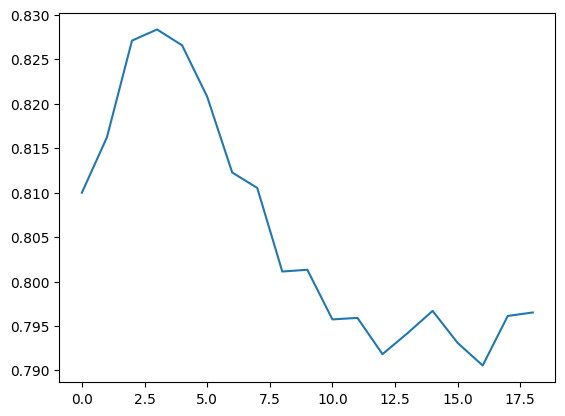

In [57]:
plt.plot(scores)

In [58]:
compa.loc['score',"knn"]  = round(max(scores)[0],3) #sauvegardons le score

In [59]:
compa

,reg_lin,knn
score,0.844,0.828


### Exercice : tester un autre algo 

In [60]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [61]:
predicted = model_dt.predict(xtest)
predicted

array([1496.        , 1350.        , 1000.        , 2450.        ,
       2777.5       , 1852.5       ,  772.54545455,  780.        ,
       1633.75      , 1820.        , 2900.        , 1690.83333333,
       1580.        , 2300.        , 1875.        , 2358.        ,
       2647.33333333, 2156.        , 1165.        ,  972.        ,
       1500.        ,  800.        , 2395.        , 1850.        ,
       1690.83333333,  646.        , 2683.        ,  950.        ,
       1250.        , 1225.        , 1500.        , 1640.        ,
       3300.        , 2240.        , 1795.        , 1850.        ,
       3000.        ,  530.        ,  745.        ,  958.        ,
        772.54545455, 1450.        ,  823.25      , 2955.        ,
       2207.5       , 1852.5       , 1371.25      ,  530.        ,
       1100.        , 1500.        ,  745.        , 2427.5       ,
       1355.        , 1500.        , 1875.        ,  823.25      ,
       1690.83333333, 3783.33333333, 2955.        ,  730.     

In [62]:
ytest

,price
804,1488
413,2200
509,1300
749,1800
28,2941
...,...
140,3000
259,899
581,3840
549,950


In [63]:
r2_score(ytest, predicted)

0.8136376925120606

In [64]:
compa.loc['score',"decisiontree"]  = r2_score(ytest, predicted) #sauvegardons le score
compa

,reg_lin,knn,decisiontree
score,0.844,0.828,0.813638


# Crossvalidation 

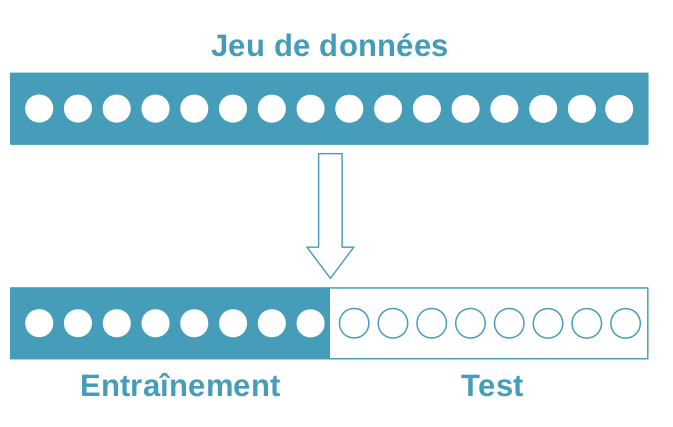

Une cross-validation à 5 folds : Chaque point appartient à 1 des 5 jeux de test (en blanc) et aux 4 autres jeux d’entraînements (en orange)

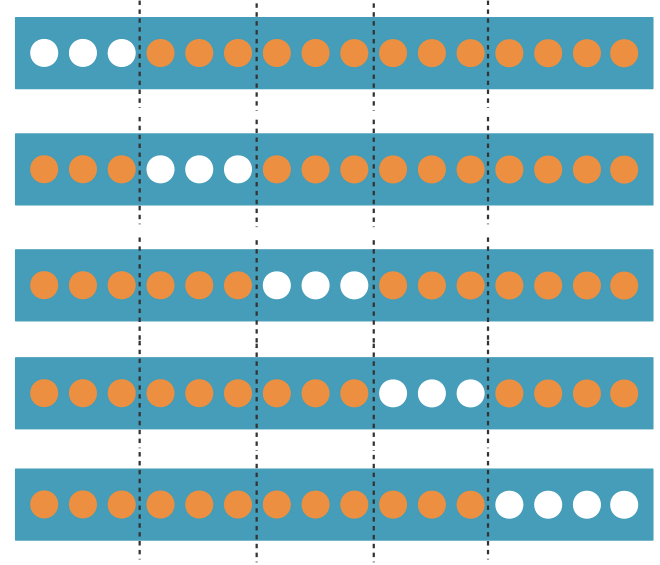

C’est dommage, nous n’avons utilisé qu'une partie du jeu de données pour entraîner, et qu'une partie pour tester ! Et si nous avions par hasard créé un jeu de test vraiment difficile — ou vraiment facile — à prédire ? L’estimation de la performance serait biaisée !

Par ailleurs, moins on a de données, moins bien on apprend. Ne sommes-nous donc pas en train de créer des modèles moins bons, juste pour pouvoir les valider ?

La validation croisée va nous permettre d’utiliser l'intégralité de notre jeu de données pour l’entraînement et pour la validation ! Voilà comment ça marche :

On découpe le jeu de données en k parties (folds en anglais) à peu près égales. Tour à tour, chacune des k parties est utilisée comme jeu de test. Le reste (autrement dit, l’union des k-1 autres parties) est utilisé pour l'entraînement.
Une cross-validation à 5 folds : Chaque point appartient à 1 des 5 jeux de test (en blanc) et aux 4 autres jeux d’entraînements (en orange).
Une cross-validation à 5 folds : Chaque point appartient à 1 des 5 jeux de test (en blanc) et aux 4 autres jeux d’entraînements (en orange)

À la fin, chaque point (ou observation) a servi 1 fois dans un jeu de test, (k-1) fois dans un jeu d'entraînement. J'ai donc 1 prédiction par point de mon jeu initial, et aucune de ces prédictions n'a été faite avec un jeu d'entraînement qui contienne ce point. Je n'ai pas violé le principe de ne pas valider sur le jeu d'entraînement !

Je peux finalement rapporter la performance de mon modèle :

    soit en évaluant les prédictions faites sur l’ensemble des données (puisque j’ai fait une prédiction par point du jeu de données complet) ;

    soit en moyennant les performances obtenues sur les k folds, auquel cas je peux aussi rapporter l’erreur type, pour quantifier la variation de ces performances sur les k f

À la fin, chaque point (ou observation) a servi 1 fois dans un jeu de test, (k-1) fois dans un jeu d'entraînement. J'ai donc 1 prédiction par point de mon jeu initial, et aucune de ces prédictions n'a été faite avec un jeu d'entraînement qui contienne ce point. Je n'ai pas violé le principe de ne pas valider sur le jeu d'entraînement !

Je peux finalement rapporter la performance de mon modèle :

    soit en évaluant les prédictions faites sur l’ensemble des données (puisque j’ai fait une prédiction par point du jeu de données complet) ;

    soit en moyennant les performances obtenues sur les k folds, auquel cas je peux aussi rapporter l’erreur type, pour quantifier la variation de ces performances sur les k folds.

Entrée : données X (dimension nxp), étiquettes y (dimension n), nombre de folds k


Couper [0, 1, ..., n-1] en k parties de taille (n/k). (La dernière partie sera un peu plus petite si n n'est pas un multiple de k)


for i=0 to (k-1):

    Former le jeu de test (X_test, y_test) en restreignant X et y aux indices contenus dans la i-ième partie.

    Former le jeu d'entraînement (X_train, y_train) en restreignant X et y aux autres indices.

    Entraîner l'algorithme sur le jeu d'entraînement

    Utiliser le modèle ainsi obtenu pour prédire sur le jeu de test

        Calculer l'erreur du modèle en comparant les étiquettes prédites aux vraies étiquettes contenues dans y_test


Sortie : la valeur moyenne des erreurs calculées sur les k folds.

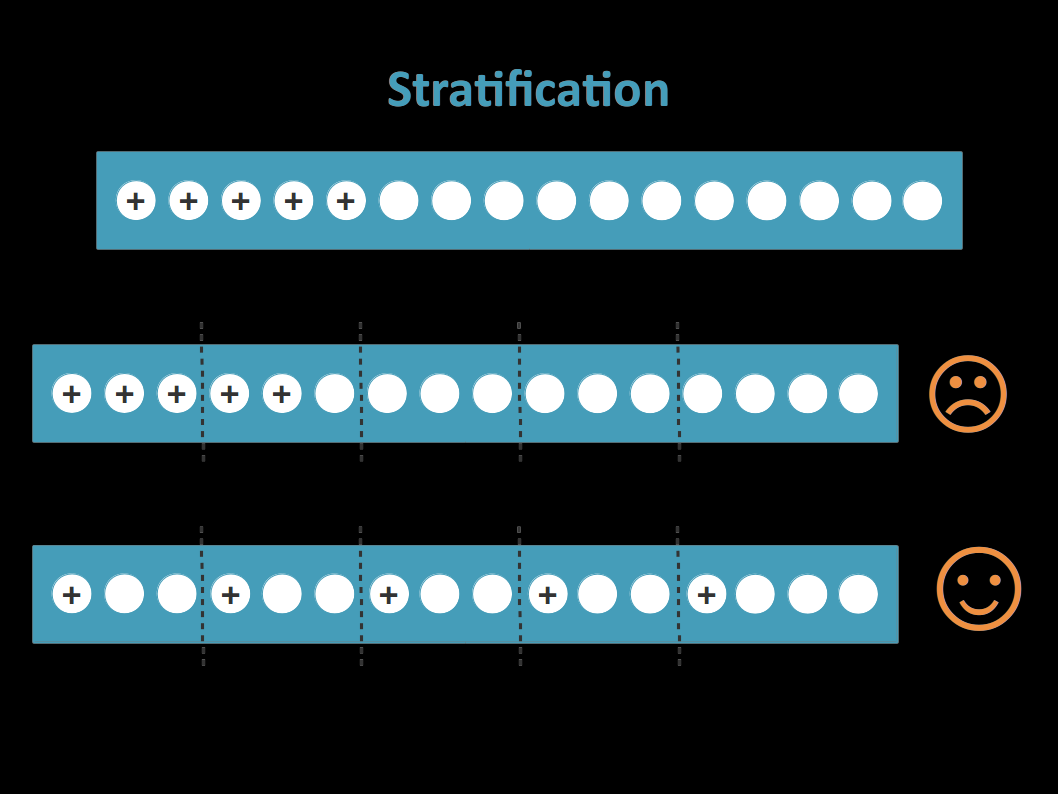

# Mettons en application la crossval

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('winequality-white.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Nos données contiennent 11 colonnes, 10 qui correspondent à divers indicateurs physico-chimiques et 1 qui est la qualité du vin.

Nous allons extraire deux arrays numpy de ces données, un qui contient les points et l’autre qui contient les étiquettes

In [66]:
X = data[data.columns[:-1]].values
y = data['quality'].values

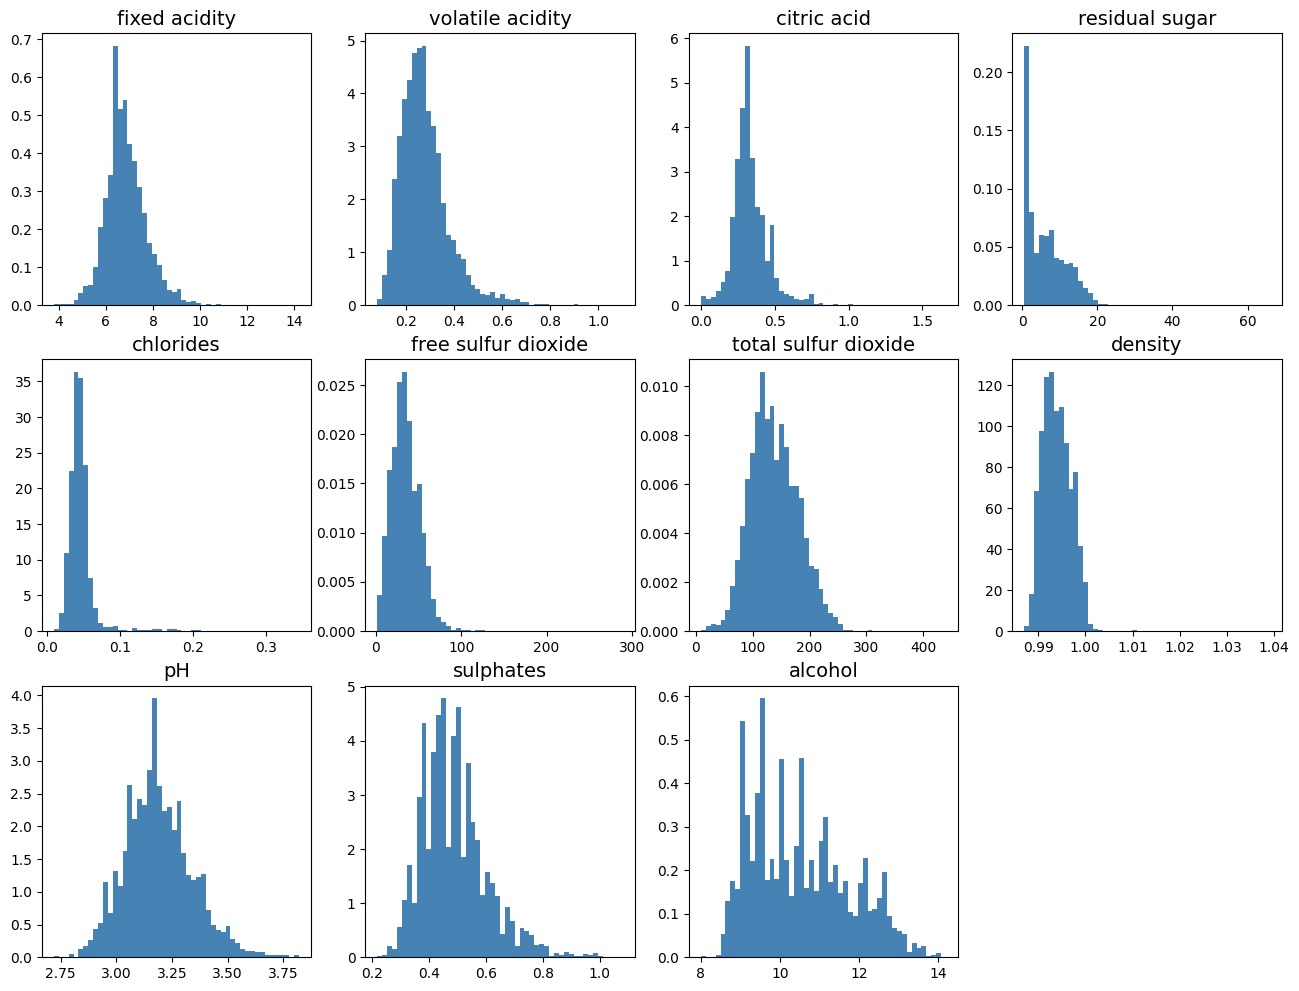

In [67]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


On remarque en particulier que ces variables prennent des valeurs dans des ensembles différents. Par exemple, “sulphates” varie de 0 à 1 tandis que “total sulfur dioxide” varie de 0 à 440. Il va donc nous falloir standardiser les données pour que la deuxième ne domine pas complètement la première.

In [68]:
y_class = np.where(y<6, 0, 1)

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [69]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_class,
                                test_size=0.3 # 30% des données dans le jeu de test
                                )

Nous pouvons maintenant standardiser les données d’entraînement et appliquer la même transformation aux données de test :

In [70]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

On peut visualiser de nouveau les données pour vérifier que les différentes variables prennent des valeurs qui ont maintenant des ordres de grandewur similaires.

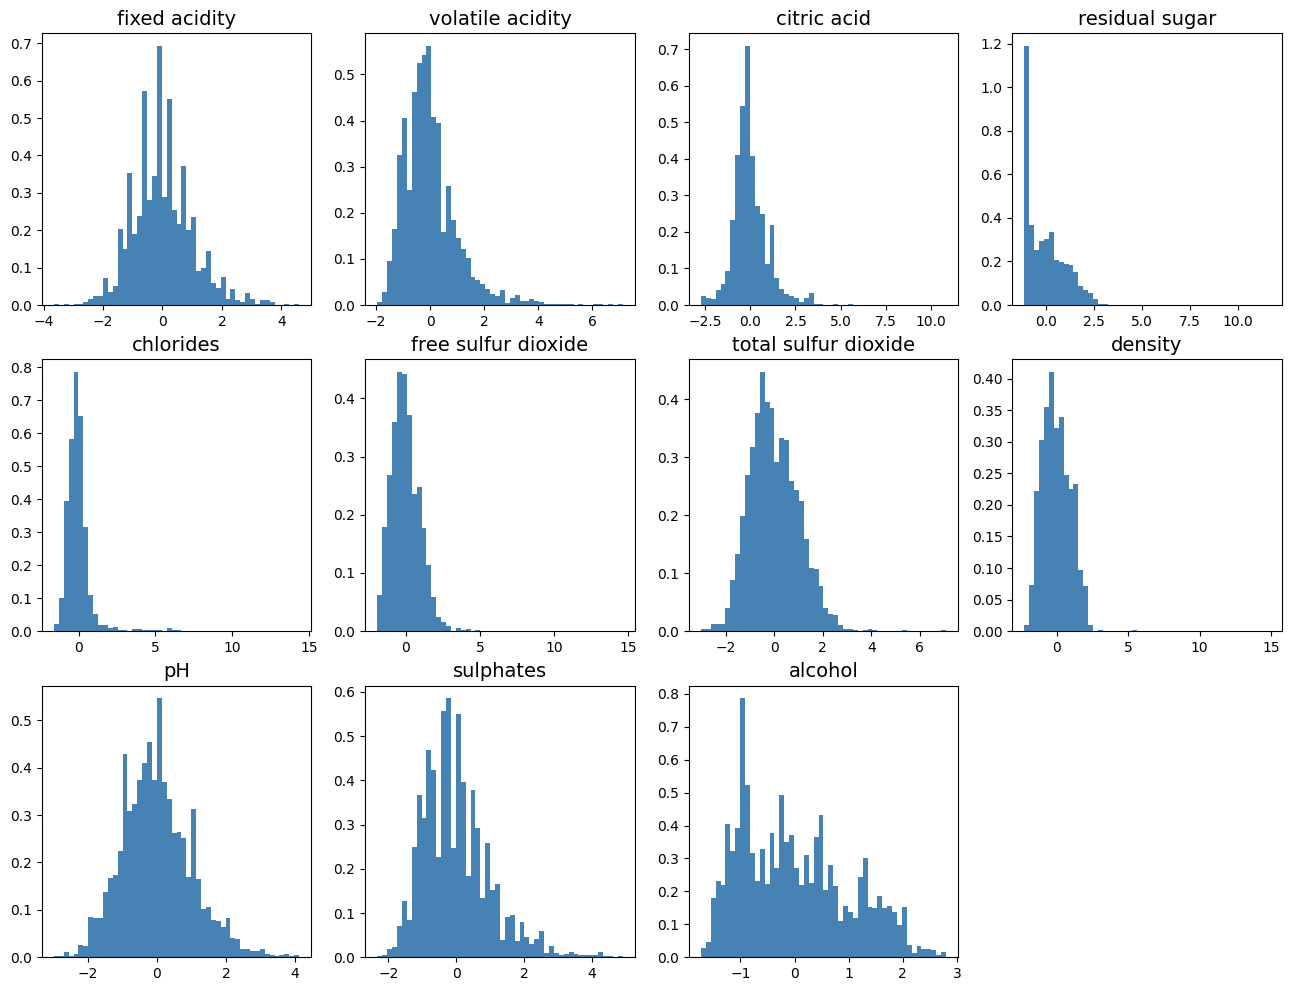

In [71]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


Nous allons maintenant utiliser la méthode "GridSearchCV" pour faire une validation croisée du paramètre k d’un kNN (le nombre de plus proches voisins) sur le jeu d’entraînement :

In [86]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 5}
Résultats de la validation croisée :
accuracy = 0.756 (+/-0.025) for {'n_neighbors': 3}
accuracy = 0.761 (+/-0.029) for {'n_neighbors': 5}
accuracy = 0.757 (+/-0.034) for {'n_neighbors': 7}
accuracy = 0.757 (+/-0.026) for {'n_neighbors': 9}
accuracy = 0.757 (+/-0.023) for {'n_neighbors': 11}
accuracy = 0.754 (+/-0.018) for {'n_neighbors': 13}
accuracy = 0.756 (+/-0.028) for {'n_neighbors': 15}


In [73]:
from sklearn import neighbors, metrics
from sklearn.linear_model import RidgeClassifier

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur Ridge avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    RidgeClassifier(), # un classifieur Ridge 
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.001}
Résultats de la validation croisée :
accuracy = 0.747 (+/-0.041) for {'alpha': 0.001}
accuracy = 0.747 (+/-0.041) for {'alpha': 0.005}
accuracy = 0.747 (+/-0.041) for {'alpha': 0.01}
accuracy = 0.747 (+/-0.041) for {'alpha': 0.05}
accuracy = 0.747 (+/-0.041) for {'alpha': 0.1}
accuracy = 0.747 (+/-0.041) for {'alpha': 0.15}
accuracy = 0.747 (+/-0.041) for {'alpha': 0.2}


In [74]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.745


In [75]:
X_test_std

array([[-0.54257629, -0.57828711, -0.28428352, ...,  0.14120623,
        -1.2880692 ,  0.21019399],
       [ 0.53233308, -0.38213926,  0.04282025, ..., -0.58679548,
         0.43300473, -1.24575749],
       [ 1.12950495, -0.38213926,  0.36992402, ...,  0.14120623,
         0.51905842, -0.51778175],
       ...,
       [-0.54257629,  0.3043782 ,  1.35123534, ..., -0.05733969,
         0.34695103,  1.09994212],
       [-2.21465752, -1.06865672,  1.841891  , ...,  1.92811953,
        -0.85780072,  0.21019399],
       [-0.18427316, -0.08791749,  2.90497826, ..., -1.51334312,
        -0.51358593, -1.0839851 ]])

In [77]:
#clf.predict_proba(X_test_std) #ne fonctionne pas sur ridge

In [78]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

# Matrice de confusion

Prédire un incendie quand il n’y en a pas, ne pas prédire un incendie quand il y en a un, ne pas en prédire quand il n’y en a pas… On s’y perd vite ! Pour y voir plus clair, on utilise une matrice de confusion (normalement le terme fait allusion à la confusion du modèle, pas à celle du Data Scientist ;) ).
Matrice de confusion

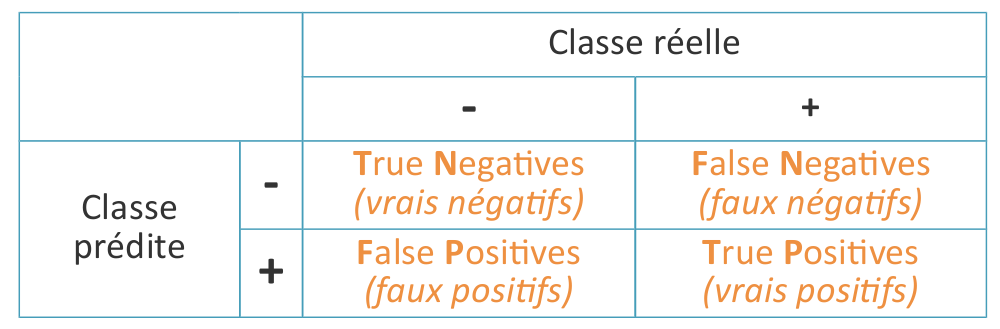

ppelons "positive" la classe correspondant à un incendie et "négative" l’autre. Si on prédit un incendie quand il y en a bien un, on fait une prédiction "positif" qui est correcte, c’est un vrai positif. Si par contre cette prédiction est incorrecte, il s’agit d’un faux positif. Et ainsi de suite. On appelle aussi parfois "erreur de type I" les faux positifs, et "erreur de type II" les faux négatifs.

Pour obtenir une matrice de confusion avec scikit-learn, il suffit d’utiliser la fonction confusion_matrix

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix (y_pred, y_test)

array([[244, 130],
       [245, 851]], dtype=int64)

In [80]:
import seaborn as sns

<Axes: >

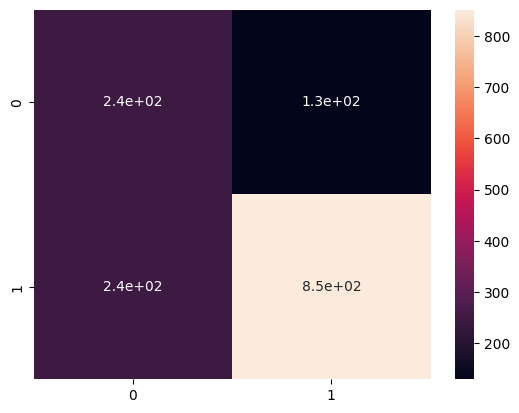

In [81]:
sns.heatmap(confusion_matrix (y_pred, y_test),annot=True)

À partir de la matrice de confusion on peut dériver tout un tas de critères de performance. De manière générale, on préfère donner une fraction d'erreurs à un nombre total d'erreurs (5% d'erreurs, ça parle plus que 10 erreurs, quand on ne connaît pas le nombre de points dans le jeu de test).

Voici quelques exemples de mesures de performance souvent utilisées :

Le rappel ("recall"  en anglais), ou sensibilité ("sensitivity" en anglais), est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés. C’est la capacité de notre modèle à détecter tous les incendies.

### Rappel = TP / (TP+FN)

On peut facilement avoir un très bon rappel… En prédisant systématiquement "positif". On ne ratera aucun incendie, mais notre modèle ne sert pas à grand chose.

On s’intéressera donc aussi à la précision, c’est-à-dire la proportion de prédictions correctes parmi les points que l’on a prédits positifs. C’est la capacité de notre modèle à ne déclencher d’alarme que pour un vrai incendie. 

### Précision=TP/(TP+FP)

En anglais on distingue "precision" (la précision dont je viens de parler) et "accuracy" (la proportion de points correctement prédits) ; en français il n’y a pas de bonne traduction qui différencie les deux…

Mais on peut relativement facilement avoir une très bonne précision… en prédisant très peu de positifs (on risque moins de se tromper). 

Pour évaluer un compromis entre rappel et précision, on peut calculer la "F-mesure", qui est leur moyenne harmonique.

### F−mesure=2×Précision×Rappel / (Précision+Rappel) = 2 TP2 / (TP+FP+FN)

Pour finir cette longue liste, on s’intéresse aussi souvent à la spécificité ("specificity" en anglais), qui est le taux de vrais négatifs, autrement dit la capacité à détecter toutes les  situations où il n’y a pas d’incendie. C’est une mesure complémentaire de la sensibilité. 



### Spécificité=TN / (FP+TN)


Toutes ces mesures de performance sont disponibles dans le module metrics de scikit-learn.

Text(0, 0.5, 'Sensibilite')

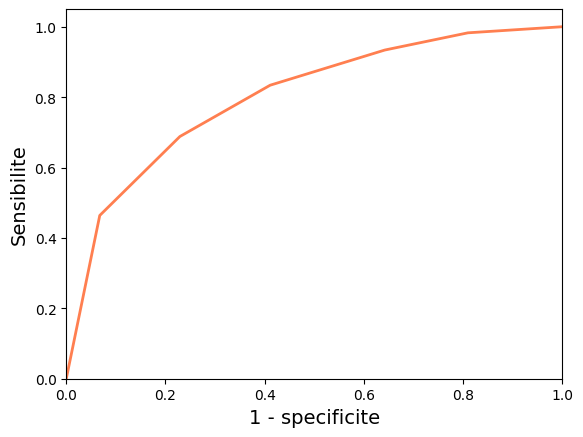

In [87]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

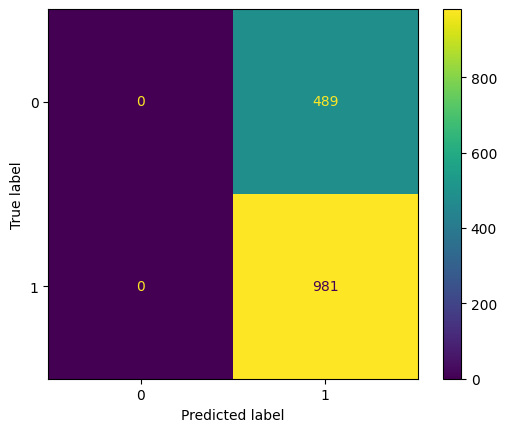

In [95]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #modif ici car l'ancienne fonction a été supprimée 

clf_dummy = DummyClassifier(random_state=42) 
#establishing random_state for reproducibility
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


In [90]:
import sklearn
print(sklearn.__version__)

1.3.0


In [84]:
y_pred 

array([1, 0, 0, ..., 1, 1, 0])

In [85]:
metrics.accuracy_score(y_test, y_pred)

0.7448979591836735

### Exercice 1

faire une nouvelle crossvalidation  avec un autre modèle de classification

In [99]:
from sklearn import neighbors, metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
#model_dt = DecisionTreeRegressor()
#model_dt.fit(xtrain, ytrain)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur DT avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    DecisionTreeClassifier(), # un classifieur DT
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 13}
Résultats de la validation croisée :
accuracy = 0.670 (+/-0.045) for {'max_depth': 1}
accuracy = 0.749 (+/-0.035) for {'max_depth': 2}
accuracy = 0.756 (+/-0.029) for {'max_depth': 3}
accuracy = 0.755 (+/-0.033) for {'max_depth': 4}
accuracy = 0.748 (+/-0.016) for {'max_depth': 5}
accuracy = 0.749 (+/-0.043) for {'max_depth': 6}
accuracy = 0.761 (+/-0.025) for {'max_depth': 7}
accuracy = 0.761 (+/-0.027) for {'max_depth': 8}
accuracy = 0.761 (+/-0.037) for {'max_depth': 9}
accuracy = 0.770 (+/-0.042) for {'max_depth': 10}
accuracy = 0.768 (+/-0.051) for {'max_depth': 11}
accuracy = 0.764 (+/-0.043) for {'max_depth': 12}
accuracy = 0.772 (+/-0.038) for {'max_depth': 13}
accuracy = 0.768 (+/-0.041) for {'max_depth': 14}


In [100]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.772


In [101]:
X_test_std

array([[-0.54257629, -0.57828711, -0.28428352, ...,  0.14120623,
        -1.2880692 ,  0.21019399],
       [ 0.53233308, -0.38213926,  0.04282025, ..., -0.58679548,
         0.43300473, -1.24575749],
       [ 1.12950495, -0.38213926,  0.36992402, ...,  0.14120623,
         0.51905842, -0.51778175],
       ...,
       [-0.54257629,  0.3043782 ,  1.35123534, ..., -0.05733969,
         0.34695103,  1.09994212],
       [-2.21465752, -1.06865672,  1.841891  , ...,  1.92811953,
        -0.85780072,  0.21019399],
       [-0.18427316, -0.08791749,  2.90497826, ..., -1.51334312,
        -0.51358593, -1.0839851 ]])

In [102]:
clf.predict_proba(X_test_std)

array([[0.10909091, 0.89090909],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [103]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Exercice 2

faire une nouvelle crossvalidation  avec un autre modèle de régression

In [124]:
raw_data = pd.read_csv('house_data.csv')

In [125]:

# Il y a quelques valeurs manquantes, on supprime ces lignes
data_na = raw_data.dropna()

# Comme vu dans le TP, on a des outliers sur les grands propriétés
data = data_na[data_na["price"] < 8000]

# On reindexe
data = data.reset_index(drop = True)

<Axes: xlabel='price', ylabel='surface'>

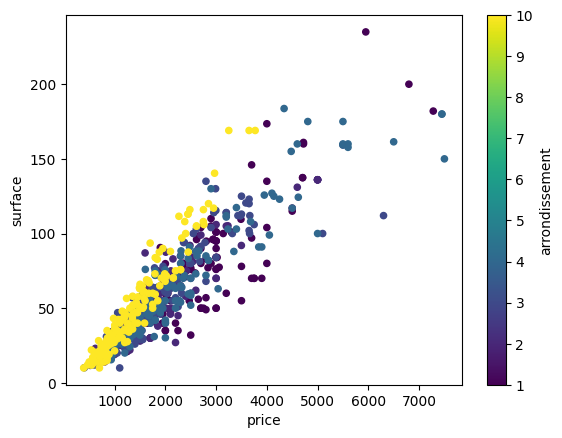

In [126]:
# On affiche les données nettoyées
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')

In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(data[["surface", "arrondissement"]], data[["price"]], test_size=0.3)

In [134]:
ytrain

,price
709,1002
98,2315
239,899
698,2450
734,1200
...,...
237,1375
45,4722
318,3480
529,930


In [135]:
ytest

,price
618,1150
255,1700
480,2324
100,2500
555,1380
...,...
224,1640
775,680
78,2840
72,715


In [129]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(xtrain)
X_train_std = std_scale.transform(xtrain)
X_test_std = std_scale.transform(xtest)

In [140]:
from sklearn import neighbors, metrics
from sklearn.tree import DecisionTreeRegressor

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'max_depth':np.arange(1, 15)}

# Choisir un score à optimiser, ici le R² (car l'accuracy est une métrique de classification et non de régression :).) 
score = 'r2'

# Créer un regresseur DT avec recherche d'hyperparamètre par validation croisée
rgr = model_selection.GridSearchCV(
    DecisionTreeRegressor(), # un regresseur DT
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce régresseur sur le jeu d'entraînement
rgr.fit(X_train_std, ytrain)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rgr.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        rgr.cv_results_['mean_test_score'], # score moyen
        rgr.cv_results_['std_test_score'],  # écart-type du score
        rgr.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 4}
Résultats de la validation croisée :
r2 = 0.491 (+/-0.078) for {'max_depth': 1}
r2 = 0.737 (+/-0.087) for {'max_depth': 2}
r2 = 0.807 (+/-0.091) for {'max_depth': 3}
r2 = 0.829 (+/-0.104) for {'max_depth': 4}
r2 = 0.822 (+/-0.129) for {'max_depth': 5}
r2 = 0.822 (+/-0.097) for {'max_depth': 6}
r2 = 0.808 (+/-0.111) for {'max_depth': 7}
r2 = 0.801 (+/-0.083) for {'max_depth': 8}
r2 = 0.785 (+/-0.083) for {'max_depth': 9}
r2 = 0.783 (+/-0.090) for {'max_depth': 10}
r2 = 0.780 (+/-0.079) for {'max_depth': 11}
r2 = 0.777 (+/-0.090) for {'max_depth': 12}
r2 = 0.778 (+/-0.083) for {'max_depth': 13}
r2 = 0.779 (+/-0.089) for {'max_depth': 14}
